In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-insurance-cost-dataset/insurance.csv


In [2]:
#Necessary Libraries and other set up
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

import sqlite3


Setup Complete


In [3]:
medical_insurance_path =  '/kaggle/input/medical-insurance-cost-dataset/insurance.csv'
medical_insurance_data = pd.read_csv(medical_insurance_path) 
medical_insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


It seems that the data does not have unnecessary columns. However, based on the first five entrees, the charges per patient seems extremely inconsistent. This can be seen with index 0 and 1 where index 1's charge is over 9 times smaller than index 0's cost. The only notable difference is that index 0 smokes along with the lack of children which make the charges even more confusing. Why does index 0's cost over 9 times greater when the only pressing liability with them is that they smoke and they are slightly overweight? Compared to index 1, being an 18-year-old parent who is overweight.

First, let's get rid of any duplicate entrees and null entrees if they exist.

In [4]:
# Check for nulls before cleaning
print("Null values per column:")
print(medical_insurance_data.isnull().sum())
print(f"\nDuplicates: {medical_insurance_data.duplicated().sum()}")

# Remove nulls and duplicates
cleaned_df = medical_insurance_data.dropna().drop_duplicates()

print(f"\nOriginal shape: {medical_insurance_data.shape}")
print(f"Cleaned shape: {cleaned_df.shape}")
print(f"Removed {medical_insurance_data.shape[0] - cleaned_df.shape[0]} rows")

# Display first few rows
print("\nCleaned data preview:")
print(cleaned_df.head())

Null values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Duplicates: 1

Original shape: (1338, 7)
Cleaned shape: (1337, 7)
Removed 1 rows

Cleaned data preview:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


**Fig. 1**

<Axes: xlabel='region', ylabel='count'>

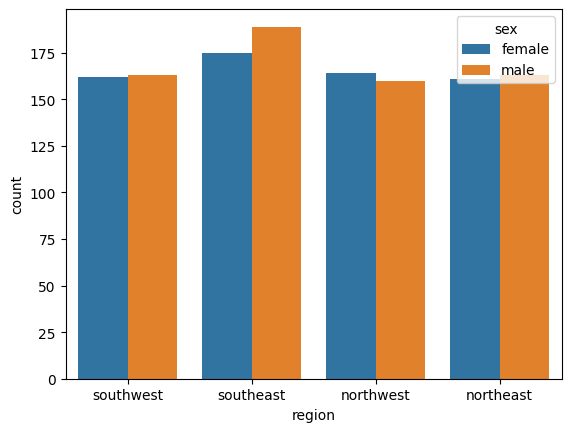

In [5]:
sns.countplot(data=cleaned_df, x='region' , hue='sex'  )

**Fig 2.**

<Axes: xlabel='smoker', ylabel='charges'>

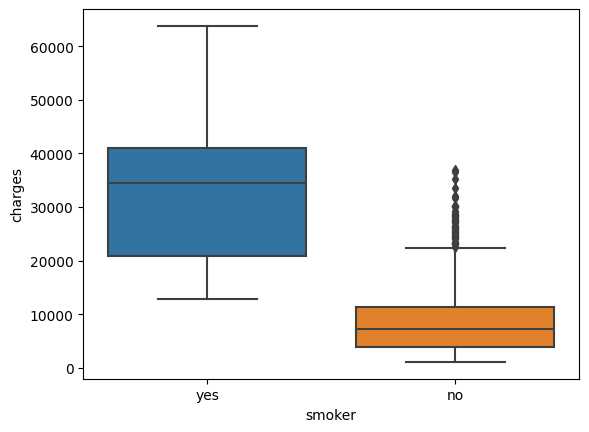

In [6]:
sns.boxplot(x='smoker', y='charges', data=cleaned_df)



**Fig 3.**

<Axes: xlabel='age', ylabel='charges'>

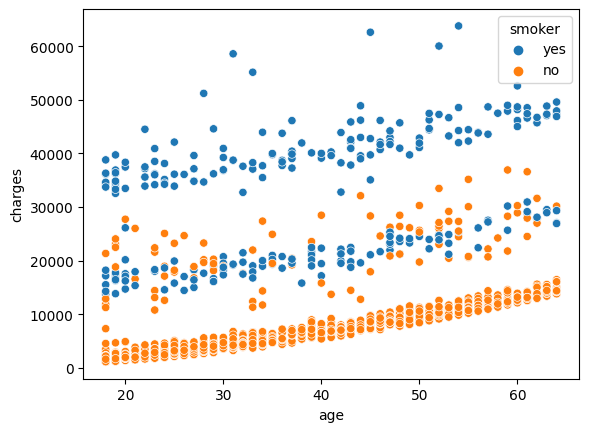

In [7]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=cleaned_df)



**Fig 4.**

<Axes: xlabel='bmi', ylabel='charges'>

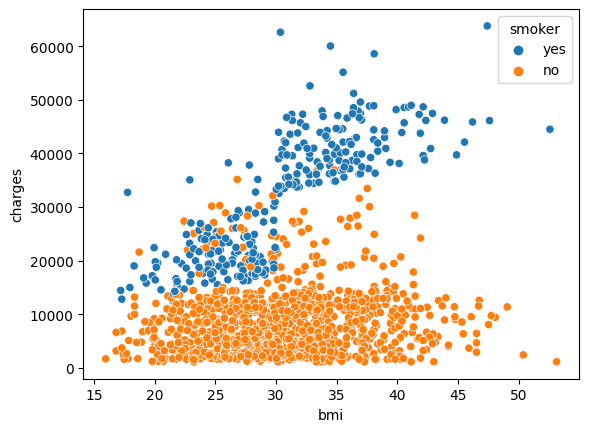

In [8]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=cleaned_df)

**Fig 5.**

<Axes: xlabel='children', ylabel='charges'>

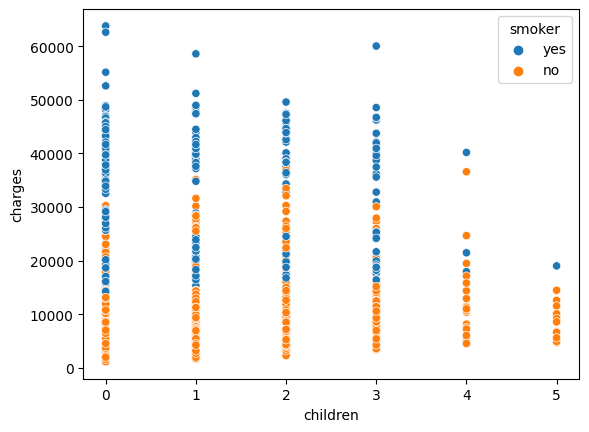

In [9]:
sns.scatterplot(x='children', y='charges', hue='smoker', data=cleaned_df)

**Fig 6.**

<Axes: xlabel='sex', ylabel='charges'>

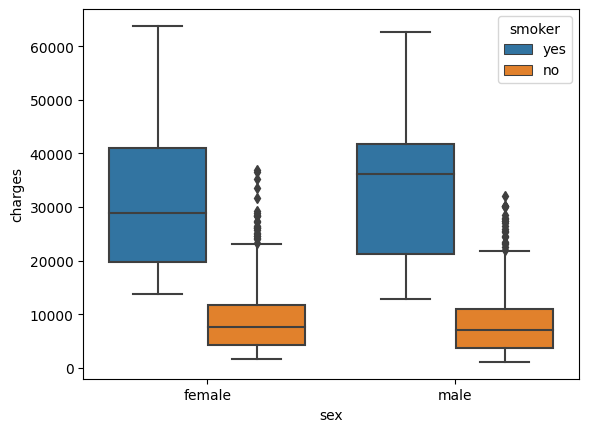

In [10]:
sns.boxplot(x='sex', y='charges', hue = 'smoker',data=cleaned_df)


An exploratory analysis was conducted on the medical insurance dataset to identify key factors influencing insurance charges. The dataset includes variables such as age, sex, BMI, number of children, smoking status, region, and insurance charges.

Key Findings


1. **Impact of Smoking on Insurance Charges**
A clear and significant correlation was observed between smoking status and insurance charges. Box plots comparing charges for smokers and non-smokers revealed that smokers incur substantially higher medical costs. This suggests that smoking is a strong predictor of increased insurance premiums, likely due to its association with higher health risks and medical interventions.
2. **Sex and Insurance Charges**
Analysis of charges by sex indicated no significant difference in medical costs between male and female policyholders. This suggests that insurance pricing, at least in this dataset, does not exhibit gender-based bias.
3. **Effect of Age on Charges**
A scatter plot of age versus charges shows a positive correlation, indicating that insurance costs tend to increase with age. This trend aligns with the general understanding that older individuals are more likely to require medical services, thus incurring higher insurance expenses.
4. **BMI and Insurance Costs**
Similarly, a positive relationship was identified between BMI and insurance charges. Individuals with higher BMI, particularly those classified as obese, tend to face increased medical costs. This may reflect the higher risk of chronic conditions associated with elevated BMI levels.


**Conclusion**:
Overall, the analysis demonstrates that **smoking**, **age**, and **BMI** are the most influential factors driving insurance charges. Meanwhile, sex and region appear to have minimal impact on cost variability. These insights are crucial for understanding how health behaviors and demographics affect medical insurance pricing and can inform both policy design and individual decision-making.